In [1]:
import numpy as np

In [2]:
def il(str):
    res = []
    for ele in str.split('/'):
        res.append([float(e) for e in ele.split('+')])
    if len(res) == 1:
        return res[0]
    else:
        return res

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['font.family']=['Arial Unicode MS']

In [5]:
theta = np.linspace(90, 0, 10)

In [6]:
cos2t = np.cos(theta * np.pi / 180) ** 2

In [7]:
right = il("3.2+7.2+19.3+39.8+63.1+91.3+115.2+139.6+153.0+157.1")
left = il("3.6+8.8+22.8+41.9+69.3+96.9+115.7+141.6+152.2+157.4")

In [8]:
def lstsq(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return k, b

In [9]:
k1, b1 = lstsq(cos2t, right)
k2, b2 = lstsq(cos2t, left)

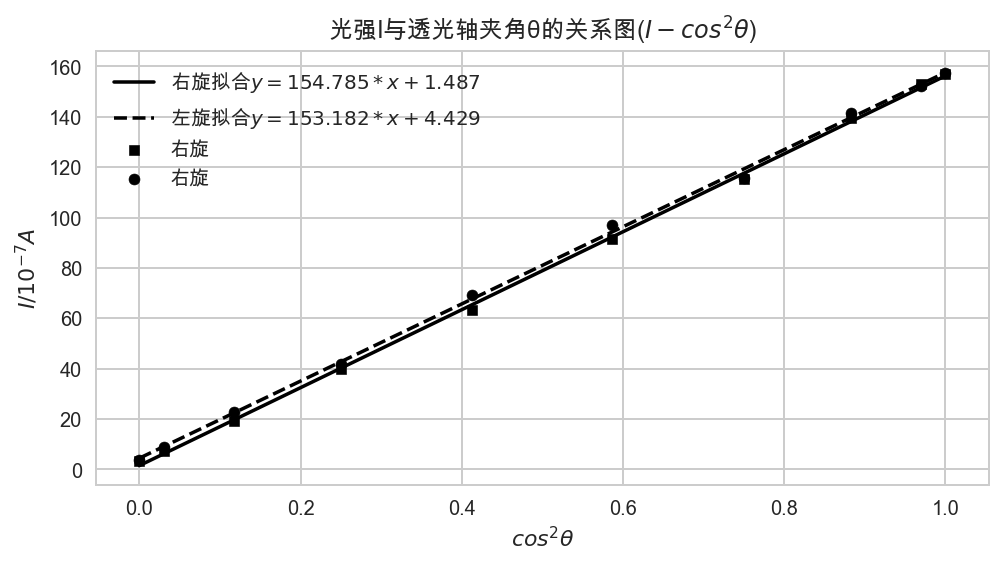

In [10]:
plt.scatter(cos2t, right, label="右旋", marker="s", c="black", s=30)
plt.plot(cos2t, k1*cos2t + b1, c="black", 
         label="右旋拟合$y={:.3f}*x+{:.3f}$".format(k1, b1))
plt.scatter(cos2t, left, label="右旋", marker="o", c="black", s=30)
plt.plot(cos2t, k2*cos2t + b2, c="black", linestyle="--", 
         label="左旋拟合$y={:.3f}*x+{:.3f}$".format(k2, b2))
plt.legend()
plt.title("光强I与透光轴夹角θ的关系图($I-cos^2θ$)")
plt.xlabel("$cos^2θ$")
plt.ylabel("$I/10^{-7}A$")
plt.savefig("output.png")